# RNA Clasificacion

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer

## Obtención de los datos

In [12]:
# 1. Cargar los datos
df = pd.read_csv('../../train.csv')

# 2. Crear la variable de respuesta categórica basada en los terciles del precio de venta
tercil_1 = df['SalePrice'].quantile(1/3)
tercil_2 = df['SalePrice'].quantile(2/3)

# Crear la categoría de precio
df['PriceCategory'] = pd.cut(
    df['SalePrice'], 
    bins=[0, tercil_1, tercil_2, float('inf')], 
    labels=['Económica', 'Intermedia', 'Cara']
)

# 3. Seleccionar las características para el modelo
selected_features = [
    'OverallQual',    # Calidad general
    'GrLivArea',      # Área habitable
    'GarageCars',     # Capacidad del garaje
    'YearBuilt',      # Año de construcción
    'TotalBsmtSF',    # Superficie total del sótano
    'FullBath',       # Baños completos
    'Neighborhood',   # Vecindario (categórica)
    'ExterQual',      # Calidad del exterior (categórica)
    'KitchenQual',    # Calidad de la cocina (categórica)
    'BsmtQual'        # Calidad del sótano (categórica)
]

# 4. Preparar los datos
X = df[selected_features].copy()
y = df['PriceCategory']

### Transformación

In [13]:
# Manejar valores faltantes en características numéricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='median')
X[numeric_features] = imputer.fit_transform(X[numeric_features])

# Manejar valores faltantes en características categóricas
categorical_features = X.select_dtypes(include=['object']).columns
X[categorical_features] = X[categorical_features].fillna('None')

# Objetos de preprocesamiento para pipeline de modelos
preprocesador_categorico = OneHotEncoder(handle_unknown="ignore")
preprocesador_numerico = StandardScaler()

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

## Generación de Modelos

In [14]:
# Generación de preprocesador
preprocesador = ColumnTransformer([
    ('one_hot_encoder',preprocesador_categorico, categorical_features),
    ('standard_scaler',preprocesador_numerico, numeric_features)
])

In [23]:
# Colocamos el Verbose = True para visualizar la pérdida por iteración
modelo_1 = make_pipeline(preprocesador,MLPClassifier(activation="tanh",verbose=True,hidden_layer_sizes=(5,3)))
modelo_1.fit(X_train,y_train)
pred1 = modelo_1.predict(X_test)

Iteration 1, loss = 1.31646662
Iteration 2, loss = 1.28166975
Iteration 3, loss = 1.24755954
Iteration 4, loss = 1.21613502
Iteration 5, loss = 1.18443346
Iteration 6, loss = 1.15531125
Iteration 7, loss = 1.12695783
Iteration 8, loss = 1.09928756
Iteration 9, loss = 1.07302362
Iteration 10, loss = 1.04648732
Iteration 11, loss = 1.02118142
Iteration 12, loss = 0.99468812
Iteration 13, loss = 0.96983017
Iteration 14, loss = 0.94614823
Iteration 15, loss = 0.92308140
Iteration 16, loss = 0.90008311
Iteration 17, loss = 0.87903523
Iteration 18, loss = 0.85846156
Iteration 19, loss = 0.83935239
Iteration 20, loss = 0.82100908
Iteration 21, loss = 0.80439512
Iteration 22, loss = 0.78871084
Iteration 23, loss = 0.77469472
Iteration 24, loss = 0.76122551
Iteration 25, loss = 0.74907824
Iteration 26, loss = 0.73843871
Iteration 27, loss = 0.72866714
Iteration 28, loss = 0.72019979
Iteration 29, loss = 0.71181750
Iteration 30, loss = 0.70400640
Iteration 31, loss = 0.69706511
Iteration 32, los

c:\Users\Fabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
cm = confusion_matrix(y_test,pred1)
accuracy=accuracy_score(y_test,pred1)
precision = precision_score(y_test,pred1,average='micro')
recall =  recall_score(y_test,pred1,average='micro')
f1 = f1_score(y_test,pred1,average='micro')
print('Accuracy: ',accuracy)
print('Precision: ', precision)
print('recall: ',recall)

Accuracy:  0.7990867579908676
Precision:  0.7990867579908676
recall:  0.7990867579908676


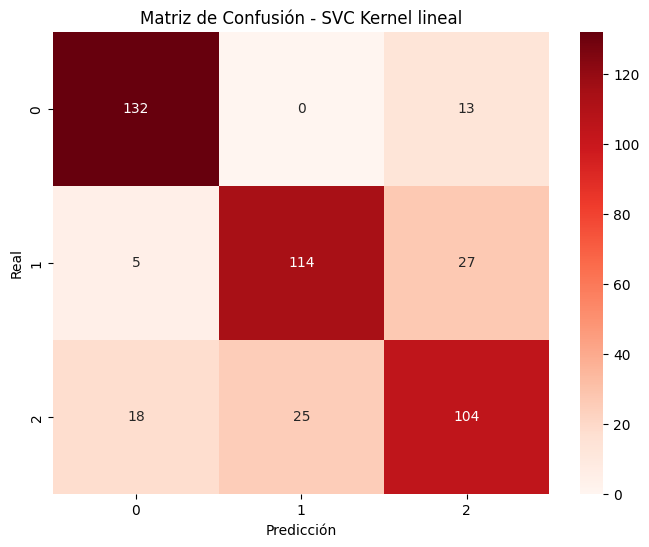

In [25]:
# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - SVC Kernel lineal")
plt.show()

In [28]:
# Colocamos el Verbose = True para visualizar la pérdida por iteración
modelo_2 = make_pipeline(preprocesador,MLPClassifier(activation="tanh",verbose=True,hidden_layer_sizes=(2,2)))
modelo_2.fit(X_train,y_train)
pred2 = modelo_2.predict(X_test)

Iteration 1, loss = 1.13128034
Iteration 2, loss = 1.11179636
Iteration 3, loss = 1.09412451
Iteration 4, loss = 1.07795079
Iteration 5, loss = 1.06370717
Iteration 6, loss = 1.05042826
Iteration 7, loss = 1.03842901
Iteration 8, loss = 1.02710363
Iteration 9, loss = 1.01665163
Iteration 10, loss = 1.00674190
Iteration 11, loss = 0.99768132
Iteration 12, loss = 0.98893441
Iteration 13, loss = 0.98072074
Iteration 14, loss = 0.97261499
Iteration 15, loss = 0.96502361
Iteration 16, loss = 0.95750869
Iteration 17, loss = 0.94995596
Iteration 18, loss = 0.94269490
Iteration 19, loss = 0.93550365
Iteration 20, loss = 0.92846876
Iteration 21, loss = 0.92127000
Iteration 22, loss = 0.91437328
Iteration 23, loss = 0.90773723
Iteration 24, loss = 0.90106829
Iteration 25, loss = 0.89439524
Iteration 26, loss = 0.88771985
Iteration 27, loss = 0.88099805
Iteration 28, loss = 0.87462714
Iteration 29, loss = 0.86825505
Iteration 30, loss = 0.86181698
Iteration 31, loss = 0.85592719
Iteration 32, los

c:\Users\Fabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [32]:
cm = confusion_matrix(y_test,pred2)
accuracy=accuracy_score(y_test,pred2)
precision = precision_score(y_test,pred2,average='micro')
recall =  recall_score(y_test,pred2,average='micro')
f1 = f1_score(y_test,pred2,average='micro')
print('Accuracy: ',accuracy)
print('Precision: ', precision)
print('recall: ',recall)

Accuracy:  0.7968036529680366
Precision:  0.7968036529680366
recall:  0.7968036529680366


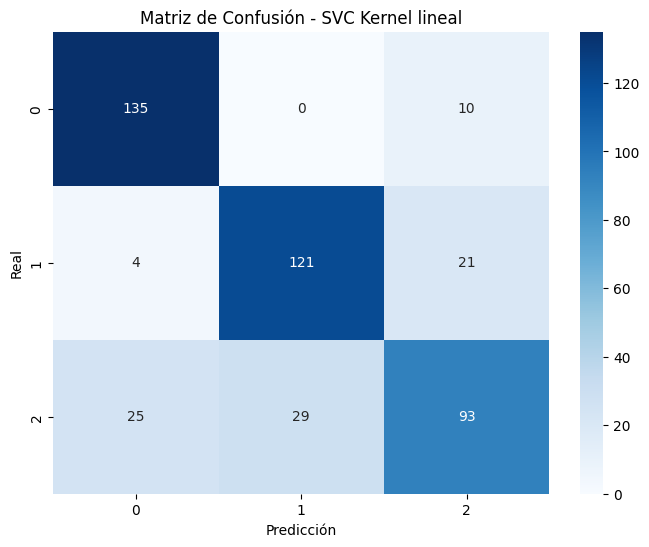

In [33]:
# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - SVC Kernel lineal")
plt.show()

## Tuneo de parámetros

In [ ]:
parametros_tun = {
    'mlpclassifier__solver': ['adam', 'lbfgs'],
    'mlpclassifier__alpha': [0.0001, 0.001, 0.01],
    'mlpclassifier__hidden_layer_sizes': [(2,2), (5,3), (10,), (6,4)],
    'mlpclassifier__learning_rate_init': [0.001, 0.01, 0.003],
    'mlpclassifier__max_iter': [300, 500, 1000],
    'mlpclassifier__early_stopping': [True]
}
model_grid_search = GridSearchCV(modelo_1, param_grid=parametros_tun,
                                 n_jobs=2, cv=10) #Vamos a usar dos procesadores(n_jobs), y 10 k-folds

model_grid_search.fit(X_train,y_train)
pred = model_grid_search.predict(X_test)
model_grid_search.best_params_

KeyboardInterrupt: 

In [ ]:
cm = confusion_matrix(y_test,pred)
accuracy=accuracy_score(y_test,pred)
precision = precision_score(y_test,pred,average='micro')
recall =  recall_score(y_test,pred,average='micro')
f1 = f1_score(y_test,pred,average='micro')
print('Accuracy: ',accuracy)
print('Precision: ', precision)
print('recall: ',recall)

Accuracy:  0.3333333333333333
Precision:  0.3333333333333333
recall:  0.3333333333333333


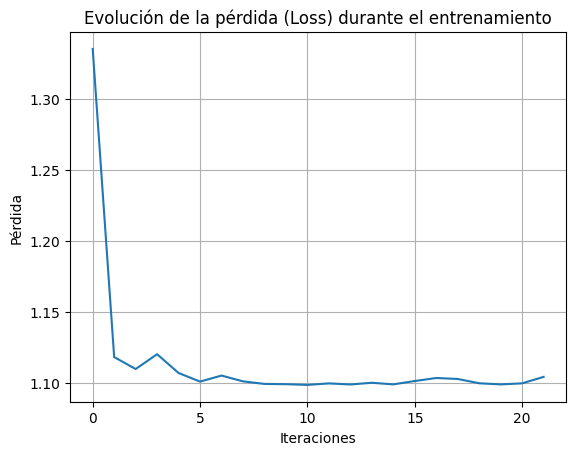

In [ ]:
# Accedemos al mejor modelo (el que GridSearchCV encontró)
mejor_modelo = model_grid_search.best_estimator_

mlp_final = mejor_modelo.named_steps['mlpclassifier']

# Ahora graficamos su loss_curve_
plt.plot(mlp_final.loss_curve_)
plt.title('Evolución de la pérdida (Loss) durante el entrenamiento')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()

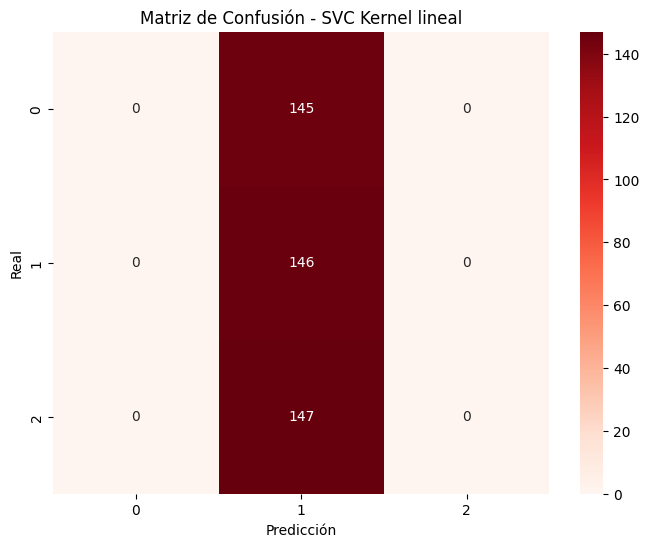

In [ ]:
# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - SVC Kernel lineal")
plt.show()